In [31]:
import numpy as np
import scipy
import seaborn as sns
import sklearn
import pandas as pd
import pickle

%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.linear_model import Perceptron
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import random
import torch
from torch import nn, optim
import math
from IPython import display

from sklearn import preprocessing

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy

from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform #Import squareform, which creates a symmetric matrix from a vector

print('Finished successfully loading packages')


Finished successfully loading packages


In [57]:
df = pd.read_csv('wines.csv')

In [59]:
df.shape

(178, 13)

### Question 1

In [62]:
X = df.values
X_scaled = StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(X_scaled)

PCA()

In [64]:
print(pca.explained_variance_)

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]


In [66]:
X = df.values
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components = 2)
P = pca.fit_transform(X_scaled)

In [68]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749 ]


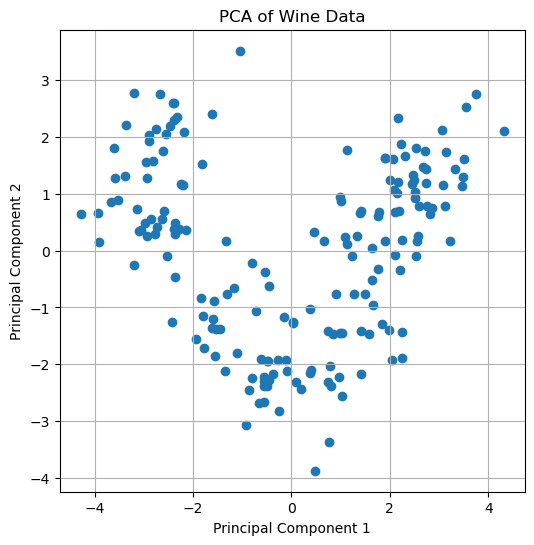

In [100]:
plt.figure(figsize=(6, 6))
plt.scatter(P[:, 0], P[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Data')
plt.grid(True)
plt.show()

Loadings for the first two principal components:
    Alcohol  Malic_Acid       Ash  Ash_Alkalinity  Magnesium  Total_Phenols  \
0  0.144329   -0.245188 -0.002051       -0.239320   0.141992       0.394661   
1  0.483652    0.224931  0.316069       -0.010591   0.299634       0.065040   

   Flavonoids  Stilbenes  Proanthocyanins  Color_Intensity       Hue  \
0    0.422934  -0.298533         0.313429        -0.088617  0.296715   
1   -0.003360   0.028779         0.039302         0.529996 -0.279235   

      OD280   Proline  
0  0.376167  0.286752  
1 -0.164496  0.364903  


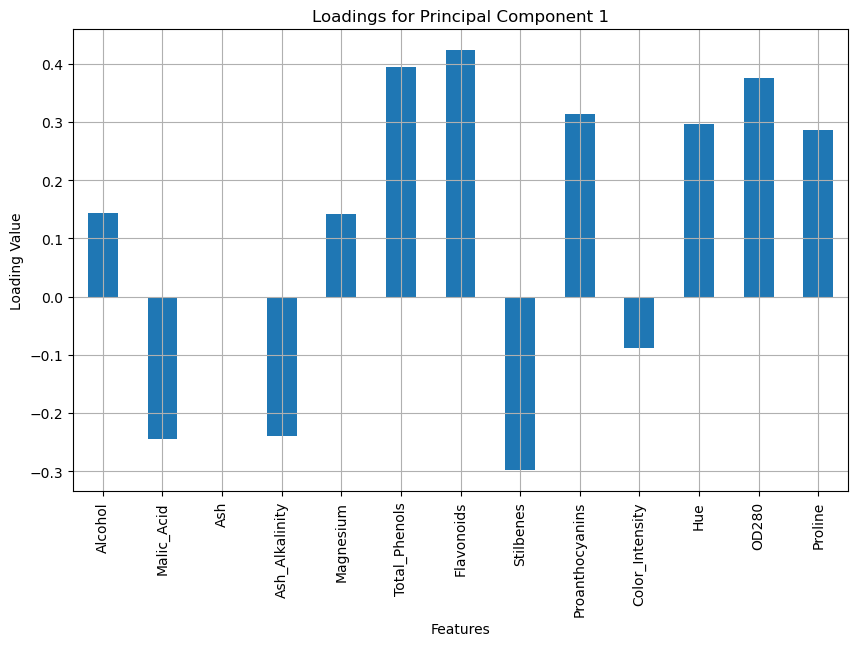

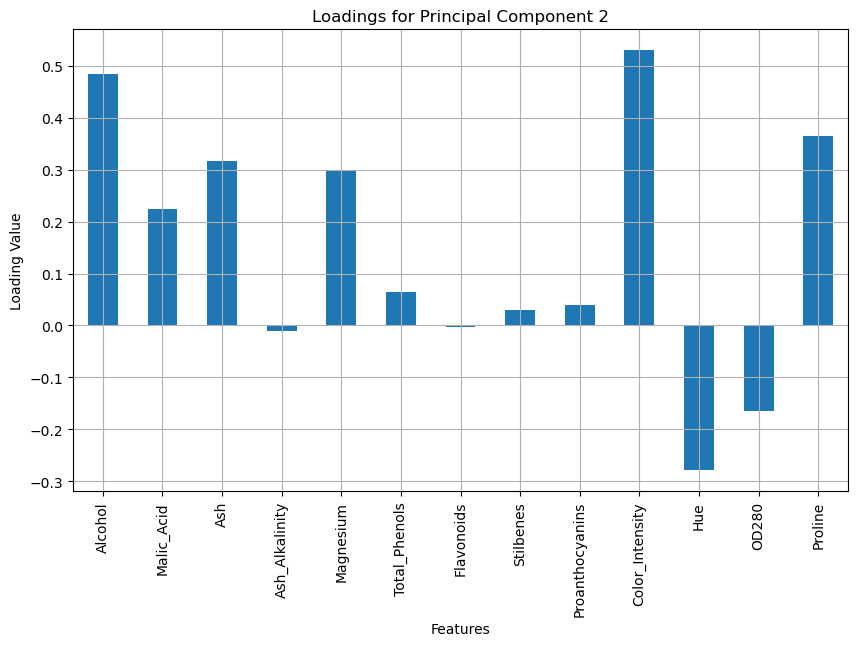

In [80]:
import pandas as pd

# Perform PCA
pca = PCA(n_components=2)
P = pca.fit_transform(X_scaled)

loadings_matrix = pca.components_

print("Loadings for the first two principal components:")
print(loadings_df)

plt.figure(figsize=(10, 6))
loadings_df.iloc[0].plot(kind='bar')
plt.title('Loadings for Principal Component 1')
plt.xlabel('Features')
plt.ylabel('Loading Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
loadings_df.iloc[1].plot(kind='bar')
plt.title('Loadings for Principal Component 2')
plt.xlabel('Features')
plt.ylabel('Loading Value')
plt.grid(True)
plt.show()


### Question 2

In [84]:
X = df.values
X_scaled = StandardScaler().fit_transform(X)

In [86]:
perplexities = range(5, 155, 1)
kl_divergences = []

In [88]:
for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, max_iter=1000, n_jobs=-1)
    X_tsne = tsne.fit_transform(X_scaled)
    kl_divergences.append(tsne.kl_divergence_)

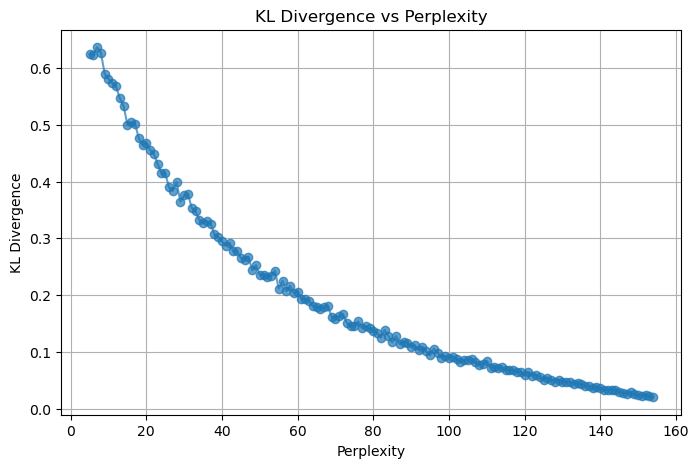

In [96]:
plt.figure(figsize=(8, 5))
plt.plot(perplexities, kl_divergences, marker='o', alpha = 0.7)
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
plt.title('KL Divergence vs Perplexity')
plt.grid(True)
plt.show()

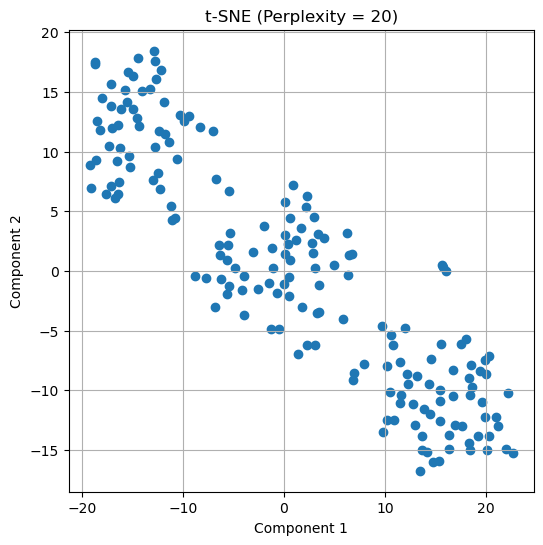

In [110]:
tsne_20 = TSNE(n_components=2, perplexity=20, max_iter=1000, learning_rate='auto', init='pca')
X_tsne_20 = tsne_20.fit_transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(X_tsne_20[:, 0], X_tsne_20[:, 1])
plt.title("t-SNE (Perplexity = 20)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

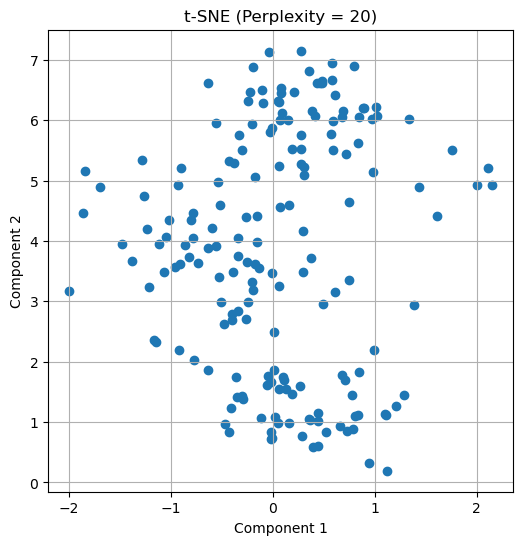

In [112]:
tsne_20 = TSNE(n_components=2, perplexity=100, max_iter=1000, learning_rate='auto', init='pca')
X_tsne_20 = tsne_20.fit_transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(X_tsne_20[:, 0], X_tsne_20[:, 1])
plt.title("t-SNE (Perplexity = 20)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

### Question 3

In [120]:
X = df.values
X_scaled = StandardScaler().fit_transform(X)

D = pairwise_distances(X_scaled)
mds = MDS(n_components=2, n_init=300, max_iter=10000, dissimilarity='precomputed', normalized_stress='auto')
X_mds = mds.fit_transform(D)

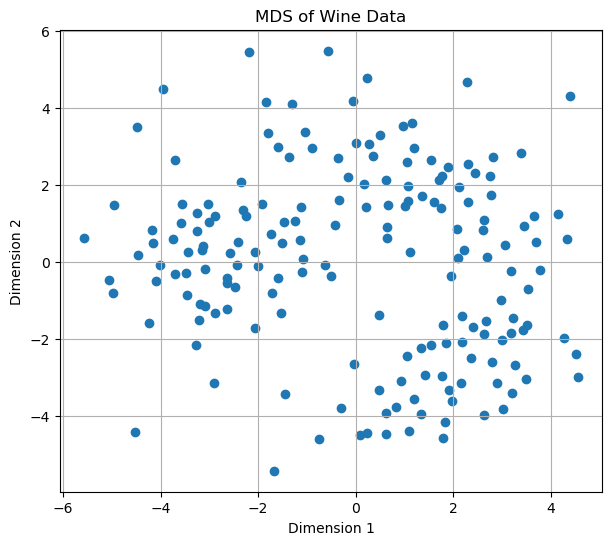

20855.9758418359


In [121]:
plt.figure(figsize=(7, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1])
plt.title('MDS of Wine Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()
print(mds.stress_)

### Question 4

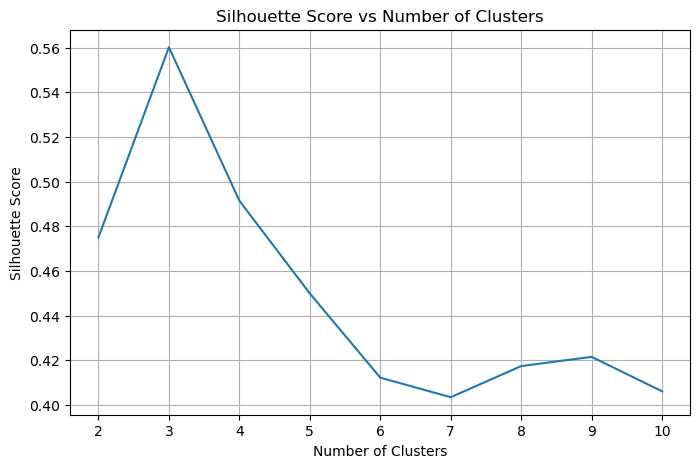

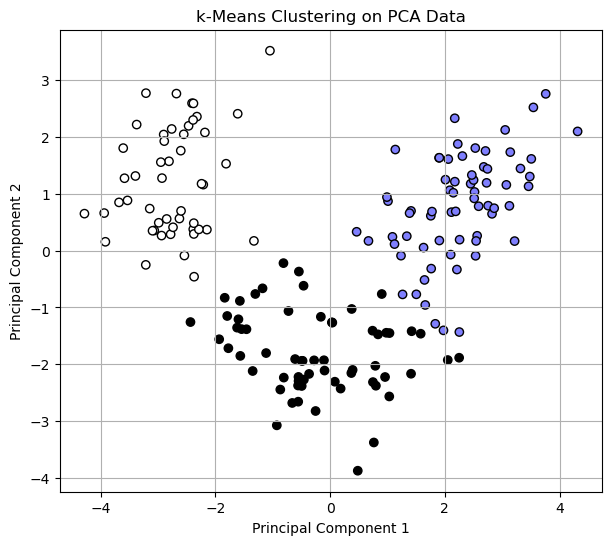

Total sum of distances to cluster centers: 260.16


In [149]:
X = df.values
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sil_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, labels)
    sil_scores.append(sil_score)

plt.figure(figsize=(8, 5))
plt.plot(k_values, sil_scores)
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(X_pca)
inertia = kmeans.inertia_

plt.figure(figsize=(7, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='gist_stern_r', edgecolor='k')
plt.title(f'k-Means Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print(f"Total sum of distances to cluster centers: {inertia:.2f}")

### Question 5

/var/folders/4k/6t17tjxj6fz1kc06k1407sy00000gn/T/ipykernel_43927/3427907709.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('gist_stern_r', len(unique_labels))


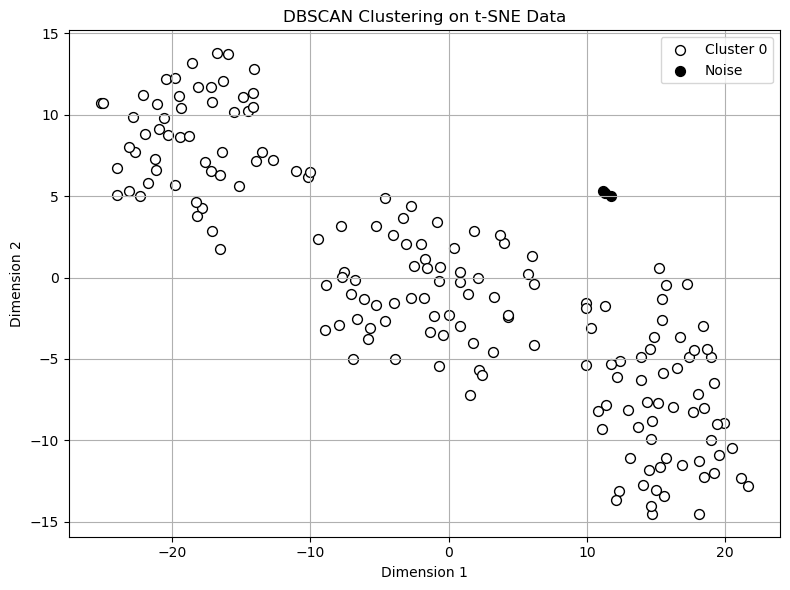

In [189]:
df = pd.read_csv('wines.csv')
X = df.values
X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, perplexity=20)
X_tsne = tsne.fit_transform(X_scaled)

eps = 4
min_samples = 5
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_tsne)

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = plt.cm.get_cmap('gist_stern_r', len(unique_labels))

for label in unique_labels:
    if label == -1:
        color = 'k'
        label_name = 'Noise'
    else:
        color = colors(label)
        label_name = f'Cluster {label}'
    plt.scatter(
        X_tsne[labels == label, 0],
        X_tsne[labels == label, 1],
        label=label_name,
        s=50,
        edgecolor='k',
        c=[color]
    )

plt.title(f'DBSCAN Clustering on t-SNE Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Extra Credit

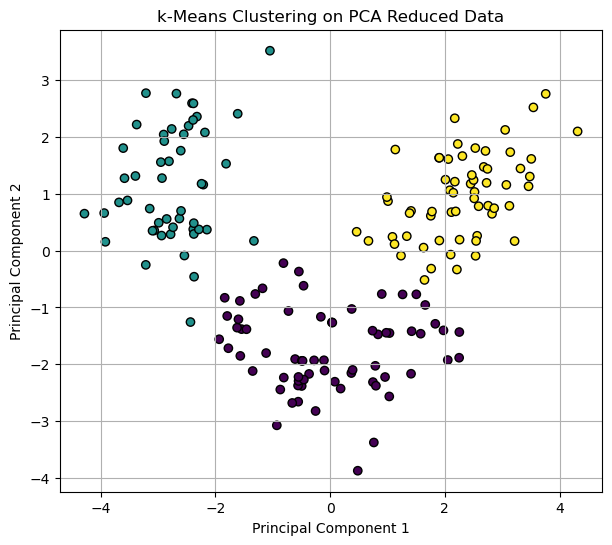

Cluster Centers (Mean values of each cluster):
[[-0.04083933 -1.74320866]
 [-2.73771147  1.16476397]
 [ 2.28888211  0.95994724]]


In [194]:
# Perform kMeans clustering on the PCA-reduced data (already in X_pca)
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust '3' based on your silhouette results
cluster_labels = kmeans.fit_predict(X_pca)

# Plot the clusters on PCA reduced data
plt.figure(figsize=(7, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.title('k-Means Clustering on PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Identify the cluster centers
centers = kmeans.cluster_centers_

print("Cluster Centers (Mean values of each cluster):")
print(centers)

# Based on these centers, you can interpret the features of each cluster


In [200]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

loadings = pca.components_

cluster_centers = np.array([[-0.04083933, -1.74320866],
                            [-2.73771147,  1.16476397],
                            [ 2.28888211,  0.95994724]])

reconstructed_features = cluster_centers.dot(loadings)

reconstructed_df = pd.DataFrame(reconstructed_features, columns=df.columns)

print(reconstructed_df)


    Alcohol  Malic_Acid       Ash  Ash_Alkalinity  Magnesium  Total_Phenols  \
0 -0.849000   -0.382088 -0.550890        0.028235  -0.528123      -0.129495   
1  0.168208    0.933244  0.373761        0.642855  -0.039730      -1.004712   
2  0.794633   -0.345284  0.298715       -0.557943   0.612636       0.965767   

   Flavonoids  Stilbenes  Proanthocyanins  Color_Intensity       Hue  \
0   -0.011415  -0.037977        -0.081311        -0.920274  0.474648   
1   -1.161785   0.850819        -0.812302         0.859927 -1.137562   
2    0.964822  -0.655680         0.755131         0.305935  0.411094   

      OD280   Proline  
0  0.271389 -0.647813  
1 -1.221437 -0.360019  
2  0.703095  1.006630  


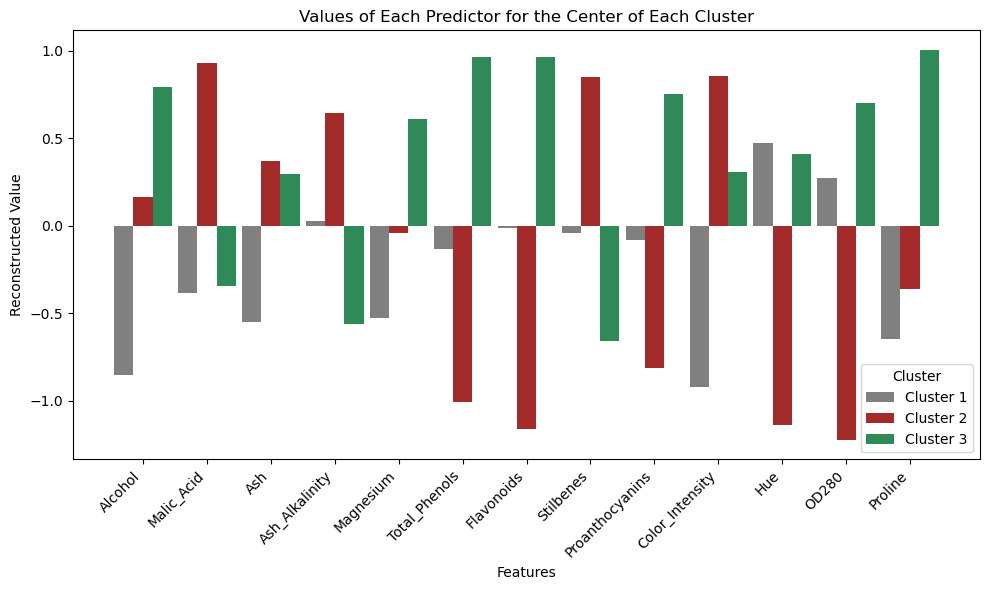

In [236]:
colors = ['gray', 'brown', 'seagreen'] 
plt.figure(figsize=(10, 6))

bar_width = 0.3
index = np.arange(len(reconstructed_df.columns))

for i, (cluster, color) in enumerate(zip(reconstructed_df.values, colors)):
    plt.bar(index + i * bar_width, cluster, bar_width, label=f'Cluster {i + 1}', color=color)

plt.title('Values of Each Predictor for the Center of Each Cluster')
plt.xlabel('Features')
plt.ylabel('Reconstructed Value')
plt.xticks(index + bar_width, reconstructed_df.columns, rotation=45, ha='right')

plt.legend(
    title='Cluster',         
)

plt.tight_layout()

plt.show()


In [238]:
import numpy as np
import pandas as pd

# Assuming you already have your PCA object fitted:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Get loadings
loadings = pca.components_

# Make a nice dataframe
loading_df = pd.DataFrame(loadings.T, 
                          columns=['PC1', 'PC2'], 
                          index=df.columns)

# Take absolute value to find strongest contributors
loading_df_abs = loading_df.abs()

# Sort features by importance for PC1 and PC2
top_features_pc1 = loading_df_abs['PC1'].sort_values(ascending=False)
top_features_pc2 = loading_df_abs['PC2'].sort_values(ascending=False)

print("Top features for PC1:")
print(top_features_pc1)

print("\nTop features for PC2:")
print(top_features_pc2)


Top features for PC1:
Flavonoids         0.422934
Total_Phenols      0.394661
OD280              0.376167
Proanthocyanins    0.313429
Stilbenes          0.298533
Hue                0.296715
Proline            0.286752
Malic_Acid         0.245188
Ash_Alkalinity     0.239320
Alcohol            0.144329
Magnesium          0.141992
Color_Intensity    0.088617
Ash                0.002051
Name: PC1, dtype: float64

Top features for PC2:
Color_Intensity    0.529996
Alcohol            0.483652
Proline            0.364903
Ash                0.316069
Magnesium          0.299634
Hue                0.279235
Malic_Acid         0.224931
OD280              0.164496
Total_Phenols      0.065040
Proanthocyanins    0.039302
Stilbenes          0.028779
Ash_Alkalinity     0.010591
Flavonoids         0.003360
Name: PC2, dtype: float64


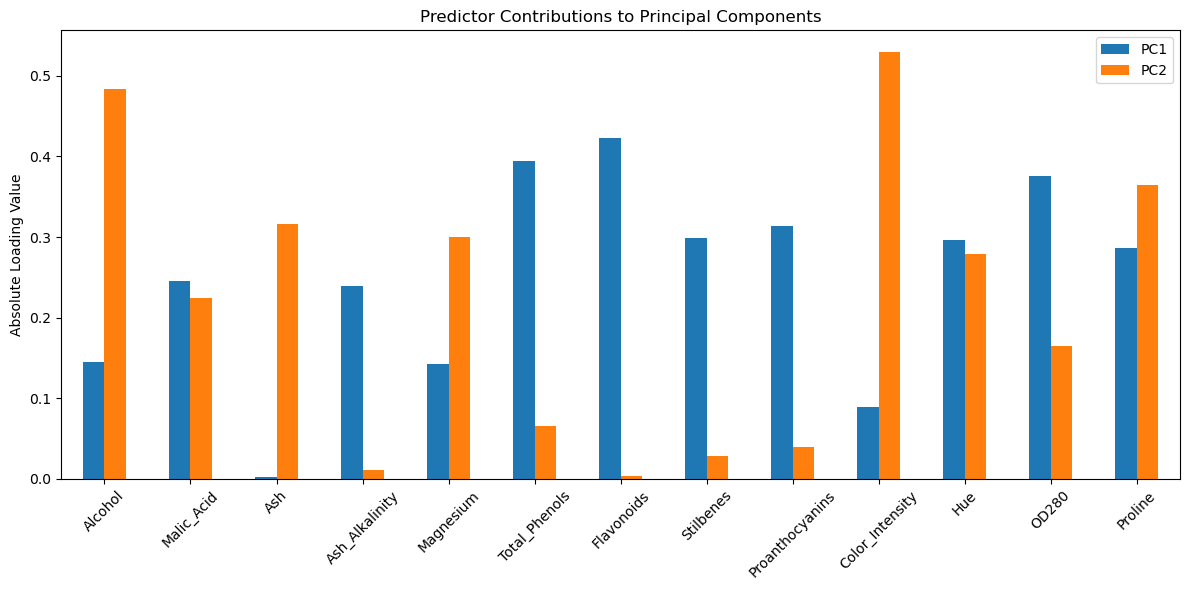

In [256]:
loading_df = pd.DataFrame(pca.components_.T, 
                          columns=['PC1', 'PC2'], 
                          index=df.columns)

loading_df.abs().plot(kind='bar', figsize=(12,6))
plt.title('Predictor Contributions to Principal Components')
plt.ylabel('Absolute Loading Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()